
# Práctica 0: Tutorial de uso de Google Colab y Python

**Objetivo:** Este notebook ofrece un recorrido práctico por Google Colab para el curso *Modelos Computacionales y Simulación de Sistemas*. Verás cómo:
- Configurar Colab (GPU/TPU), gestionar archivos y usar Drive.
- Usar librerías clave: `numpy`, `matplotlib`, `scipy`, `sympy`, `ipywidgets`.
- Graficar (lineal, múltiples curvas, subplots, 3D).
- Crear controles interactivos para explorar modelos (p.ej., logístico y SIR).
- Actualizar una gráfica en “tiempo real” durante una simulación.
- Introducción a IA/AA con `scikit-learn`, `tensorflow` y `pytorch`.
- **Ejercicios guiados** para practicar cada bloque.



> **Sugerencia:** ejecuta las celdas en orden. Las celdas con el icono ▶️ a la izquierda contienen código; las citas en bloques grises son explicaciones.


## 1. Conceptos básicos de Colab


- Un notebook está compuesto por **celdas** de **código** y **texto** (Markdown).
- Puedes **insertar**, **mover** y **eliminar** celdas desde el menú o con atajos.
- Todo lo que instales/descargues se pierde cuando la sesión termina (a menos que guardes en Drive).


### 1.1 Aceleración por hardware (CPU/GPU/TPU)

In [1]:

# Detectar si hay GPU disponible (útil para TensorFlow/PyTorch)
import platform, sys, subprocess

def print_header(title):
    print("="*len(title))
    print(title)
    print("="*len(title))

print_header("Información del entorno")
print("Python:", sys.version.split()[0], "| Plataforma:", sys.platform, "| Máquina:", platform.machine())

# CUDA vía nvidia-smi (si existe)
try:
    out = subprocess.check_output(["nvidia-smi", "-L"], text=True)
    print_header("GPUs detectadas (nvidia-smi)")
    print(out)
except Exception as e:
    print_header("GPUs detectadas (nvidia-smi)")
    print("No hay nvidia-smi o no se detecta GPU.")


Información del entorno
Python: 3.12.11 | Plataforma: linux | Máquina: x86_64
GPUs detectadas (nvidia-smi)
No hay nvidia-smi o no se detecta GPU.



**Ejercicio 1 — Verifica tu acelerador:**  
Cambia el tipo de hardware en: `Entorno de ejecución → Cambiar tipo de entorno de ejecución → Acelerador de hardware (GPU/TPU)` y vuelve a ejecutar la celda anterior. ¿Qué cambia en la salida?


La maquina dectecta la GPU y muestra una unica GPU Tesla T4 con su UUID

### 1.2 Gestión de archivos y Google Drive

In [2]:

# (Opcional) Montar Google Drive para leer/escribir archivos persistentemente
# from google.colab import drive
# drive.mount('/content/drive')

# ¡Prueba a guardar un archivo!
with open("hola_colab.txt", "w", encoding="utf-8") as f:
    f.write("Hola, Colab!")
print("Archivo 'hola_colab.txt' creado en el directorio de trabajo actual.")


Archivo 'hola_colab.txt' creado en el directorio de trabajo actual.



**Ejercicio 2 — Persistencia:**  
Monta tu Drive y guarda un gráfico (de la sección 2) en una carpeta de tu Drive.


## 2. Librerías base para modelado y simulación

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, signal, optimize
import sympy as sp

print("Versiones:")
print("numpy:", np.__version__)
print("matplotlib:", plt.matplotlib.__version__)
try:
    import scipy
    print("scipy:", scipy.__version__)
except Exception:
    pass
print("sympy:", sp.__version__)


Versiones:
numpy: 2.0.2
matplotlib: 3.10.0
scipy: 1.16.1
sympy: 1.13.3


### 2.1 Gráficas básicas con Matplotlib

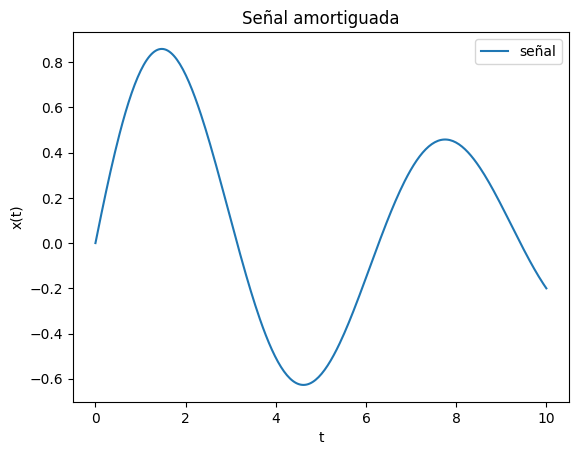

In [4]:

# Señal simple y su visualización
x = np.linspace(0, 10, 300)
y = np.sin(x) * np.exp(-0.1*x)

plt.figure()
plt.plot(x, y, label="señal")
plt.title("Señal amortiguada")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.show()


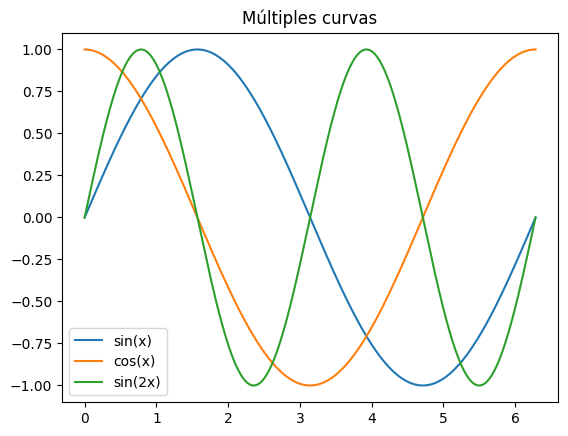

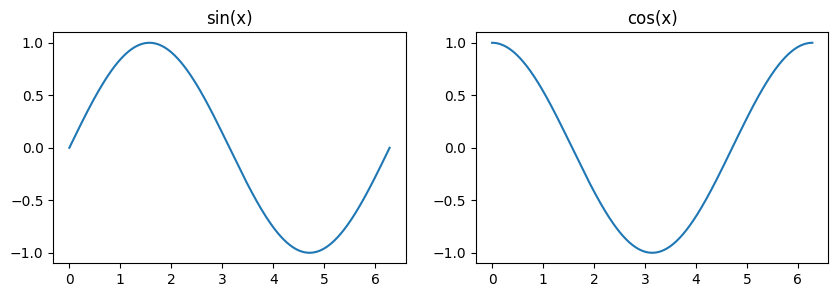

In [5]:

# Múltiples curvas y subplots
x = np.linspace(0, 2*np.pi, 400)
y1, y2, y3 = np.sin(x), np.cos(x), np.sin(2*x)

plt.figure()
plt.plot(x, y1, label="sin(x)")
plt.plot(x, y2, label="cos(x)")
plt.plot(x, y3, label="sin(2x)")
plt.title("Múltiples curvas")
plt.legend()
plt.show()

# Subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(x, y1); axs[0].set_title("sin(x)")
axs[1].plot(x, y2); axs[1].set_title("cos(x)")
plt.show()



**Ejercicio 3 — Estilo y anotaciones:**  
Añade líneas verticales/horizontales, anotaciones (`annotate`), y rejilla (`grid`) para resaltar máximos/mínimos.


### 2.2 Matemática simbólica con SymPy

In [6]:

t = sp.symbols('t', real=True)
x = sp.Function('x')(t)
ode = sp.Eq(sp.diff(x, t) - 0.5*x, 0)  # dx/dt = 0.5 x
sol = sp.dsolve(ode)
sol


Eq(x(t), C1*exp(0.5*t))


**Ejercicio 4 — EDO simbólica:**  
Resuelve simbólicamente \(\dot{x} = ax\) y representa la solución para varios valores de \(a\) de manera numérica con `numpy`/`matplotlib`.


## 3. Simulación continua: EDOs (solve_ivp) — Modelo SIR

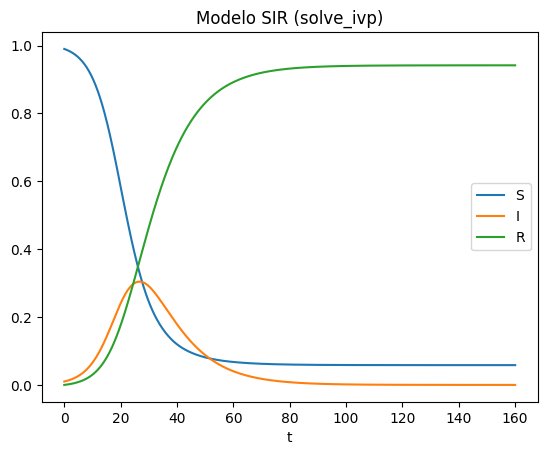

In [7]:

def sir(t, y, beta, gamma):
    S, I, R = y
    N = S + I + R
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

# Parámetros
beta, gamma = 0.3, 0.1
y0 = [0.99, 0.01, 0.0]  # S, I, R iniciales
t_span = (0, 160)
t_eval = np.linspace(*t_span, 1000)

sol = integrate.solve_ivp(sir, t_span, y0, t_eval=t_eval, args=(beta, gamma))
S, I, R = sol.y

plt.figure()
plt.plot(sol.t, S, label="S")
plt.plot(sol.t, I, label="I")
plt.plot(sol.t, R, label="R")
plt.title("Modelo SIR (solve_ivp)")
plt.xlabel("t")
plt.legend()
plt.show()



**Ejercicio 5 — Sensibilidad:**  
Explora cómo cambian las curvas variando `beta` y `gamma`. Busca el pico de infecciones (`max(I)`) y el tiempo en el que ocurre.


### 3.1 Controles interactivos con ipywidgets

In [8]:

import ipywidgets as widgets
from IPython.display import display, clear_output

@widgets.interact(beta=(0.05, 1.0, 0.05), gamma=(0.05, 1.0, 0.05))
def simular_sir(beta=0.3, gamma=0.1):
    y0 = [0.99, 0.01, 0.0]
    t = np.linspace(0, 160, 1000)
    sol = integrate.solve_ivp(sir, (t[0], t[-1]), y0, t_eval=t, args=(beta, gamma))
    S, I, R = sol.y
    plt.figure()
    plt.plot(sol.t, S, label="S")
    plt.plot(sol.t, I, label="I")
    plt.plot(sol.t, R, label="R")
    plt.title(f"SIR interactivo (beta={beta:.2f}, gamma={gamma:.2f})")
    plt.xlabel("t")
    plt.legend()
    plt.show()


interactive(children=(FloatSlider(value=0.3, description='beta', max=1.0, min=0.05, step=0.05), FloatSlider(va…


**Ejercicio 6 — Métricas:**  
Añade al widget el cálculo de: tamaño final del brote (1−S(t\_final)), `max(I)` y tiempo del pico.


## 4. Gráfica que se actualiza en tiempo “real” (simulación paso a paso)

In [ ]:

import time
from IPython.display import display, clear_output

# Ejemplo: oscilador amortiguado integrado paso a paso (Euler simple)
dt = 0.02
T = 10
n = int(T/dt)
x, v = 1.0, 0.0
zeta, omega = 0.1, 2.0  # amortiguamiento y frecuencia

ts, xs = [], []
plt.figure()
for k in range(n):
    # dinámica: x'' + 2*zeta*omega*x' + omega^2*x = 0
    a = -2*zeta*omega*v - (omega**2)*x
    v = v + a*dt
    x = x + v*dt

    ts.append(k*dt); xs.append(x)

    clear_output(wait=True)
    plt.clf()
    plt.plot(ts, xs, label="x(t)")
    plt.title("Actualización en 'tiempo real'")
    plt.xlabel("t"); plt.ylabel("x")
    plt.legend()
    plt.show()
    time.sleep(0.01)



**Ejercicio 7 — Estabilidad numérica:**  
Compara el integrador de Euler con `solve_ivp` (RK45) para el mismo sistema. ¿Qué paso `dt` hace inestable a Euler?


## 5. Diagramas de fases y mapas

In [ ]:

# Sistema no lineal sencillo (Van der Pol suave)
mu = 1.0
def vdp(t, y):
    x, v = y
    dx = v
    dv = mu*(1 - x**2)*v - x
    return [dx, dv]

t_span = (0, 40)
y0 = [1.0, 0.0]
t_eval = np.linspace(*t_span, 2000)
sol = integrate.solve_ivp(vdp, t_span, y0, t_eval=t_eval)

x, v = sol.y
plt.figure()
plt.plot(x, v)
plt.title("Diagrama de fases (Van der Pol)")
plt.xlabel("x"); plt.ylabel("v")
plt.show()



**Ejercicio 8 — Retrato de fases:**  
Dibuja varias trayectorias en el plano de fases para distintas condiciones iniciales. Añade un campo de direcciones con una malla.


## 6. Modelo logístico (tiempo discreto) e interacción

In [ ]:

def logistic_map(r, x0=0.2, n=200):
    xs = [x0]
    x = x0
    for _ in range(n-1):
        x = r*x*(1-x)
        xs.append(x)
    return np.array(xs)

import ipywidgets as widgets
@widgets.interact(r=(2.5, 4.0, 0.01), x0=(0.01, 0.99, 0.01))
def explorar_logistico(r=3.5, x0=0.2):
    xs = logistic_map(r, x0=x0, n=200)
    plt.figure()
    plt.plot(xs, marker='.', linestyle='-')
    plt.title(f"Mapa logístico (r={r:.2f}, x0={x0:.2f})")
    plt.xlabel("n"); plt.ylabel("x_n")
    plt.show()



**Ejercicio 9 — Diagrama de bifurcación:**  
Genera el diagrama de bifurcación del mapa logístico barriendo `r∈[2.5, 4]` y descartando transitorios.


## 7. SciPy: optimización y señales (breve)

In [ ]:

# Ajuste de parámetros por mínimos cuadrados a datos sintéticos
rng = np.random.default_rng(0)
x = np.linspace(0, 5, 50)
true = (2.0, 1.5)  # a, b
y = true[0]*np.exp(-true[1]*x) + 0.05*rng.normal(size=x.size)

def model(x, a, b):
    return a*np.exp(-b*x)

def resid(params):
    a, b = params
    return model(x, a, b) - y

res = optimize.least_squares(resid, x0=(1.0, 0.5))
a_hat, b_hat = res.x
print("Estimado:", a_hat, b_hat)

plt.figure()
plt.scatter(x, y, label="datos")
plt.plot(x, model(x, a_hat, b_hat), label="ajuste")
plt.legend(); plt.title("Ajuste no lineal")
plt.show()



**Ejercicio 10 — Ruido y robustez:**  
Aumenta el ruido y comprueba la variabilidad de los parámetros estimados. Repite el ajuste varias veces.


## 8. Aprendizaje Automático clásico con Scikit-learn

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Dataset sintético
rng = np.random.default_rng(0)
X = rng.uniform(-3, 3, size=(400, 2))
y = 0.5*X[:,0] - 1.2*X[:,1] + 0.3*X[:,0]*X[:,1] + 0.5*rng.normal(size=400)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=0)
pipe = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipe.fit(Xtr, ytr)
pred = pipe.predict(Xte)
mse = mean_squared_error(yte, pred)
rmse = np.sqrt(mse)
print("RMSE:",rmse)



**Ejercicio 11 — Clasificación:**  
Crea un clasificador (p.ej., `LogisticRegression` o `SVC`) en un dataset sintético de dos clases. Evalúa `accuracy` y usa `train_test_split`.


## 9. Redes neuronales con TensorFlow (Keras)

In [ ]:

import tensorflow as tf
import numpy as np

# Datos simples de regresión
rng = np.random.default_rng(1)
X = rng.uniform(-2, 2, size=(600, 3)).astype(np.float32)
y = (1.0*X[:,0] - 2.0*X[:,1] + 0.5*X[:,2] + 0.3*np.sin(3*X[:,0])).astype(np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
hist = model.fit(X, y, epochs=5, batch_size=64, verbose=0)  # pocas épocas para demo
print("Loss final:", hist.history['loss'][-1])



**Ejercicio 12 — Overfitting/Underfitting:**  
Separa datos de entrenamiento/validación y compara curvas de `loss`. Ajusta la capacidad (número de capas y neuronas) y la regularización (`kernel_regularizer`).


## 10. Redes neuronales con PyTorch

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_t = torch.tensor(X, dtype=torch.float32).to(device)
y_t = torch.tensor(y.reshape(-1,1), dtype=torch.float32).to(device)

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 32), nn.ReLU(),
            nn.Linear(32, 32), nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)

model = MLP().to(device)
opt = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(5):  # pocas épocas para demo
    opt.zero_grad()
    pred = model(X_t)
    loss = loss_fn(pred, y_t)
    loss.backward()
    opt.step()
    print(f"Epoch {epoch+1}: loss={loss.item():.4f}")



**Ejercicio 13 — Entrenamiento mini-batch:**  
Implementa un `DataLoader` con `batch_size=64` y entrena por 20 épocas. Grafica la curva de pérdida.
